### Full Name : Parsa Ghezelash
### Student Number : 401110437


# Support Vector Machines (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [2]:
df = pd.read_csv("Liver_Disease.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

(583, 11)
Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
label                         False
dtype: bool
label
1    416
2    167
Name: count, dtype: int64


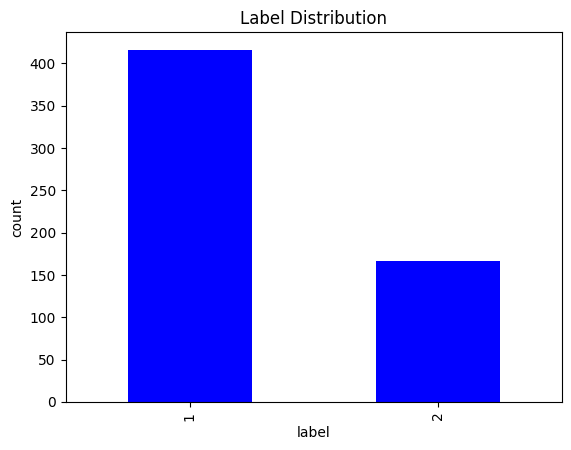

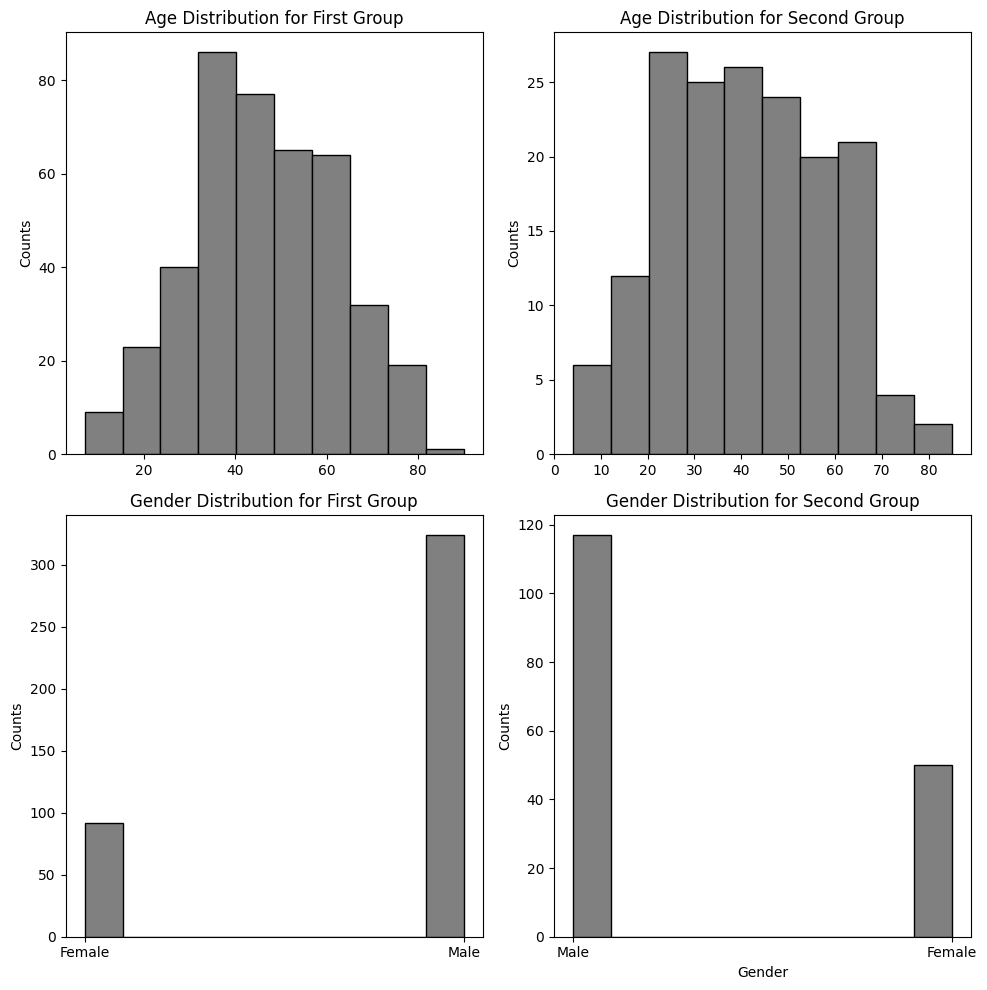

In [3]:
print(df.shape)

print(df.isna().any())

print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar', color='blue')
plt.title('Label Distribution')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].hist(df[df['label'] == 1]['Age'], color='gray', edgecolor='black')
axes[0, 0].set_title('Age Distribution for First Group')
axes[0, 0].set_ylabel('Counts')
axes[1, 1].set_xlabel('Age')

axes[0, 1].hist(df[df['label'] == 2]['Age'], color='gray', edgecolor='black')
axes[0, 1].set_title('Age Distribution for Second Group')
axes[0, 1].set_ylabel('Counts')
axes[1, 1].set_xlabel('Age')

axes[1, 0].hist(df[df['label'] == 1]['Gender'], color='gray', edgecolor='black')
axes[1, 0].set_title('Gender Distribution for First Group')
axes[1, 0].set_ylabel('Counts')
axes[1, 1].set_xlabel('Gender')

axes[1, 1].hist(df[df['label'] == 2]['Gender'], color='gray', edgecolor='black')
axes[1, 1].set_title('Gender Distribution for Second Group')
axes[1, 1].set_ylabel('Counts')
axes[1, 1].set_xlabel('Gender')

plt.tight_layout()
plt.show()


##### Question: What do you conclude from the plots?

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [4]:
def remove_outlier(df, column):
    mean = df[column].mean()
    std = df[column].std()
    return df[abs(df[column]- mean) < 3 * std], df[abs(df[column]- mean) >= 3 * std].any().any()

new_df = df.dropna()
for column in df.drop('label', axis=1).select_dtypes(include=['number']).columns:
    new_df, check = remove_outlier(df, column=column)
    print(f'{column}: {check}')
new_df.shape

Age: False
Total_Bilirubin: True
Direct_Bilirubin: True
Alkaline_Phosphotase: True
Alamine_Aminotransferase: True
Aspartate_Aminotransferase: True
Total_Protiens: True
Albumin: False
Albumin_and_Globulin_Ratio: True


(576, 11)

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
label_encoder = LabelEncoder()

numeric_columns = new_df.drop('label', axis=1).select_dtypes(include=['number']).columns
new_df[numeric_columns] = min_max_scaler.fit_transform(new_df[numeric_columns])

non_numeric_columns = new_df.drop('label', axis=1).select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    new_df[column] = label_encoder.fit_transform(new_df[column])
new_df

/var/folders/nd/th96c6vs6cdf980mjld4qg740000gn/T/ipykernel_70585/2977164624.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[numeric_columns] = min_max_scaler.fit_transform(new_df[numeric_columns])
/var/folders/nd/th96c6vs6cdf980mjld4qg740000gn/T/ipykernel_70585/2977164624.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = label_encoder.fit_transform(new_df[column])


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.37500,1
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.27500,1
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.36875,1
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.43750,1
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.06250,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.04375,2
579,0.418605,1,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.50000,1
580,0.558140,1,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.43750,1
581,0.313953,1,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.43750,1


### SVM

#### spliting data

In [6]:
from sklearn.model_selection import train_test_split
X = new_df.drop('label', axis=1)
y = new_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [7]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

print(f'Train Score = {model.score(X_train, y_train)}')
print(f'Test Score = {model.score(X_test, y_test)}')

Train Score = 0.6043478260869565
Test Score = 0.5431034482758621


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [8]:
from sklearn.model_selection import GridSearchCV 

params = {'C': [0.1, 1, 10],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'kernel': ['rbf','linear', 'poly', 'sigmoid']}

grid = GridSearchCV(model, params, refit=True, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.717 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.717 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.293 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.293 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.293 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.598 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.620 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.620 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.587 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.630 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.283 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=poly

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [9]:
print(grid.best_params_)

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [10]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, grid.best_estimator_.predict(X_test)))
print(accuracy_score(y_train, grid.best_estimator_.predict(X_train)))
print(grid.best_estimator_.score(X_test, y_test))
print(grid.best_estimator_.score(X_train, y_train))

0.5862068965517241
0.8
0.5862068965517241
0.8


Train an svm model on the entire training data using the parameters you found in the previous step.

In [11]:
best_model = SVC(**grid.best_params_, class_weight='balanced')
best_model.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', gamma=10)

### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

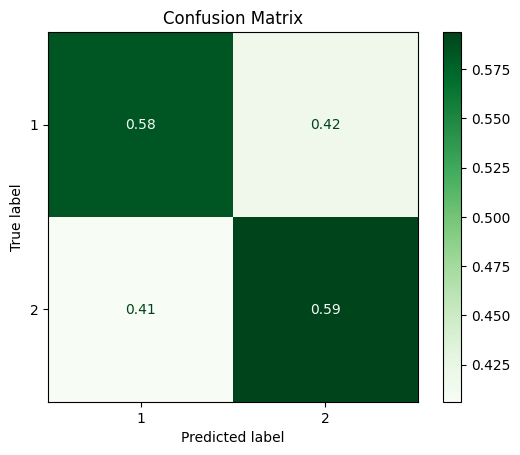

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, best_model.predict(X_test), normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [13]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

new_df = df.dropna()

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
label_encoder = LabelEncoder()

numeric_columns = new_df.drop('label', axis=1).select_dtypes(include=['number']).columns
new_df[numeric_columns] = min_max_scaler.fit_transform(new_df[numeric_columns])

non_numeric_columns = new_df.drop('label', axis=1).select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    new_df[column] = label_encoder.fit_transform(new_df[column])
new_df

/var/folders/nd/th96c6vs6cdf980mjld4qg740000gn/T/ipykernel_70585/3703469331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[numeric_columns] = min_max_scaler.fit_transform(new_df[numeric_columns])
/var/folders/nd/th96c6vs6cdf980mjld4qg740000gn/T/ipykernel_70585/3703469331.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = label_encoder.fit_transform(new_df[column])


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,2
579,0.418605,1,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,1
580,0.558140,1,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,1
581,0.313953,1,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,1


In [14]:
X = new_df.drop('label', axis=1)
y = new_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
          
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [16]:
print(f'SVM Test Score: {accuracy_score(y_test, svm.predict(X_test))}')
print(f'Logistic Regression Test Score: {logreg.score(X_test, y_test)}')

SVM Test Score: 0.6551724137931034
Logistic Regression Test Score: 0.7413793103448276
